## 1. Import Necessasary libraries

In [20]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

## 2. Import Dataset

In [3]:
walmart_footfalls_data = pd.read_csv('footfalls.csv')
walmart_footfalls_data
#the number of people entering a shop or shopping area in a given time.

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


## 3. Data Understanding

In [4]:
walmart_footfalls_data.shape

(159, 17)

In [5]:
walmart_footfalls_data.isna().sum()

Month            0
Footfalls        0
t                0
log_footfalls    0
t_square         0
Jan              0
Feb              0
Mar              0
Apr              0
May              0
Jun              0
Jul              0
Aug              0
Sep              0
Oct              0
Nov              0
Dec              0
dtype: int64

In [6]:
walmart_footfalls_data.dtypes

Month             object
Footfalls          int64
t                  int64
log_footfalls    float64
t_square           int64
Jan                int64
Feb                int64
Mar                int64
Apr                int64
May                int64
Jun                int64
Jul                int64
Aug                int64
Sep                int64
Oct                int64
Nov                int64
Dec                int64
dtype: object

### Forecasting Inputs

In [8]:
forecasting_data = pd.read_csv('Predict_new.csv')
forecasting_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


### Check the Pattern of Footfalls

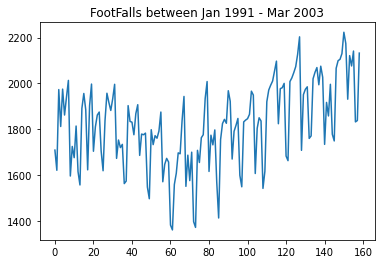

In [10]:
walmart_footfalls_data['Footfalls'].plot()
plt.title('FootFalls between Jan 1991 - Mar 2003')
plt.show()

## 4. Data Preprocessing

### 4.1 Separate the data into Month and Year

Reference : https://www.programiz.com/python-programming/datetime/strftime

In [11]:
walmart_footfalls_data["Date"] = pd.to_datetime(walmart_footfalls_data['Month'],format="%b-%y")
walmart_footfalls_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01


In [12]:
walmart_footfalls_data.dtypes

Month                    object
Footfalls                 int64
t                         int64
log_footfalls           float64
t_square                  int64
Jan                       int64
Feb                       int64
Mar                       int64
Apr                       int64
May                       int64
Jun                       int64
Jul                       int64
Aug                       int64
Sep                       int64
Oct                       int64
Nov                       int64
Dec                       int64
Date             datetime64[ns]
dtype: object

In [15]:
walmart_footfalls_data["month"] = walmart_footfalls_data['Date'].dt.strftime("%B") # month extraction
walmart_footfalls_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,January,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,February,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,March,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,April,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,November,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,December,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,January,2004
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,February,2004


In [16]:
walmart_footfalls_data["year"] = walmart_footfalls_data['Date'].dt.strftime("%Y") # year extraction
walmart_footfalls_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,January,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,February,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,March,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,April,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,November,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,December,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,January,2004
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,February,2004


In [23]:
heatmap_y_month = pd.pivot_table(data=walmart_footfalls_data,values="Footfalls",index="year",columns="month",fill_value=0)
heatmap_y_month

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1991,1812,2013,1814,1621,1709,1940,1862,1973,1975,1676,1725,1596
1992,1956,1997,1875,1557,1615,1903,1623,1891,1885,1862,1810,1704
1993,1957,1996,1734,1619,1705,1933,1882,1837,1917,1720,1753,1673
1994,1834,1907,1783,1574,1563,1868,1776,1903,1831,1776,1779,1686
1995,1733,1875,1657,1497,1548,1792,1761,1798,1772,1673,1647,1571
1996,1608,1943,1700,1361,1382,1836,1693,1559,1697,1576,1687,1551
1997,1655,2008,1797,1372,1397,1934,1776,1708,1763,1732,1774,1616
1998,1825,1922,1847,1413,1570,1968,1826,1755,1843,1817,1791,1670
1999,1840,1949,1836,1549,1599,1966,1865,1832,1846,1850,1804,1607


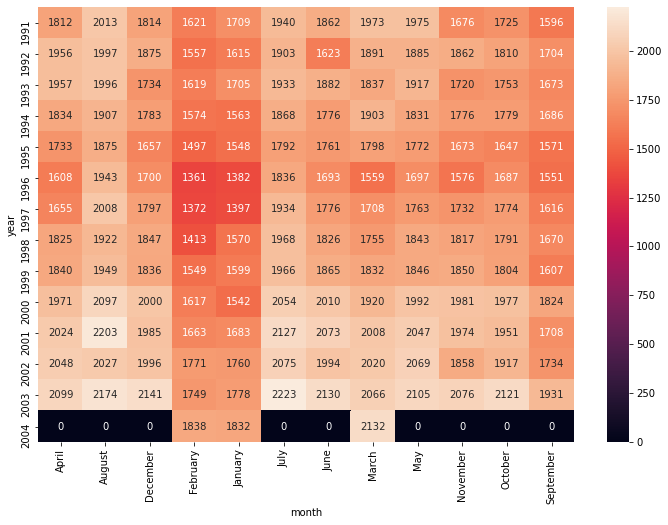

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

<AxesSubplot:xlabel='year', ylabel='Footfalls'>

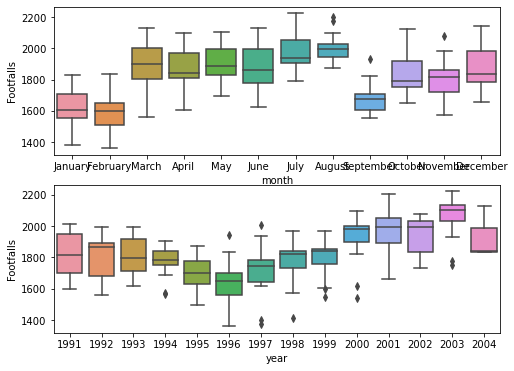

In [24]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Footfalls",data=walmart_footfalls_data)

plt.subplot(212)
sns.boxplot(x="year",y="Footfalls",data=walmart_footfalls_data)

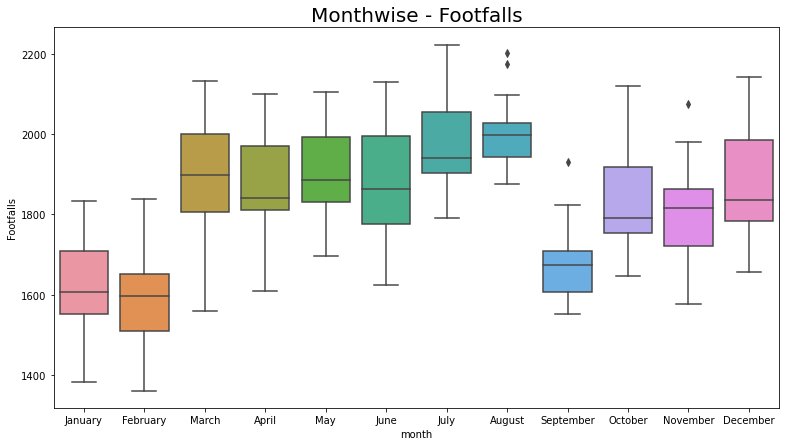

In [32]:
plt.figure(figsize=(13,7))
sns.boxplot(x="month",y="Footfalls",data=walmart_footfalls_data)
plt.title('Monthwise - Footfalls',size = 20)
plt.show()

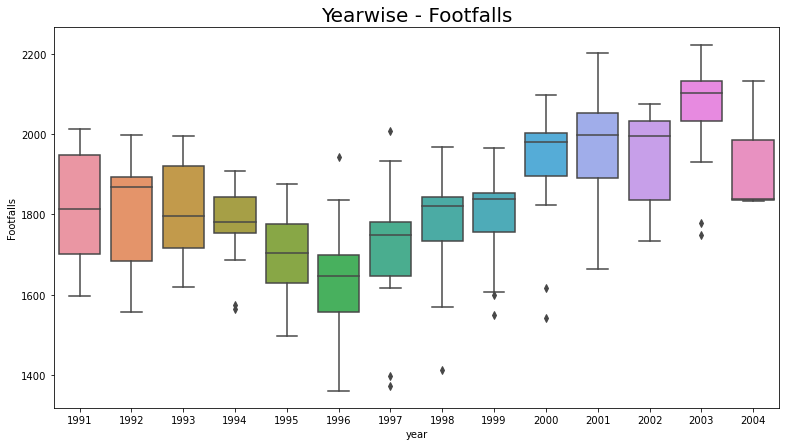

In [33]:
plt.figure(figsize=(13,7))
sns.boxplot(x="year",y="Footfalls",data=walmart_footfalls_data)
plt.title('Yearwise - Footfalls',size = 20)
plt.show()

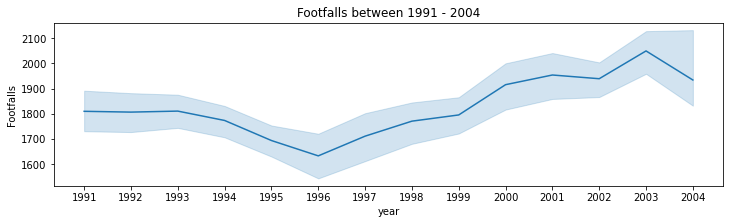

In [35]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Footfalls",data=walmart_footfalls_data)
plt.title('Footfalls between 1991 - 2004')
plt.show()

## 5. Model Building

In [36]:
walmart_footfalls_data.shape

(159, 20)

In [37]:
train_data = walmart_footfalls_data.head(147)
test_data  = walmart_footfalls_data.tail(12)

In [38]:
train_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,January,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,February,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,March,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,April,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Nov-02,1858,143,7.527256,20449,0,0,0,0,0,0,0,0,0,0,1,0,2002-11-01,November,2002
143,Dec-02,1996,144,7.598900,20736,0,0,0,0,0,0,0,0,0,0,0,1,2002-12-01,December,2002
144,Jan-03,1778,145,7.483244,21025,1,0,0,0,0,0,0,0,0,0,0,0,2003-01-01,January,2003
145,Feb-03,1749,146,7.466799,21316,0,1,0,0,0,0,0,0,0,0,0,0,2003-02-01,February,2003


In [39]:
test_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
147,Apr-03,2099,148,7.649216,21904,0,0,0,1,0,0,0,0,0,0,0,0,2003-04-01,April,2003
148,May-03,2105,149,7.652071,22201,0,0,0,0,1,0,0,0,0,0,0,0,2003-05-01,May,2003
149,Jun-03,2130,150,7.663877,22500,0,0,0,0,0,1,0,0,0,0,0,0,2003-06-01,June,2003
150,Jul-03,2223,151,7.706613,22801,0,0,0,0,0,0,1,0,0,0,0,0,2003-07-01,July,2003
151,Aug-03,2174,152,7.684324,23104,0,0,0,0,0,0,0,1,0,0,0,0,2003-08-01,August,2003
152,Sep-03,1931,153,7.565793,23409,0,0,0,0,0,0,0,0,1,0,0,0,2003-09-01,September,2003
153,Oct-03,2121,154,7.659643,23716,0,0,0,0,0,0,0,0,0,1,0,0,2003-10-01,October,2003
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,November,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,December,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,January,2004


## 6. Model Training | Testing using OLS Technique

In [42]:
#Linear Model
import statsmodels.formula.api as smf
import numpy as np

linear_model = smf.ols('Footfalls~t',data=train_data).fit() #Training
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t']))) #Testing
rmse_linear = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(pred_linear))**2)) #Evaluation metric - RMSE
rmse_linear

209.92559265462572

In [43]:
#Exponential

Exp = smf.ols('log_footfalls~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

217.05263569546594

In [44]:
#Quadratic
Quad = smf.ols('Footfalls~t+t_square',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(pred_Quad))**2))
rmse_Quad

137.15462741356473

In [45]:
#Additive seasonality 

add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(pred_add_sea))**2))
rmse_add_sea

264.66439005687704

In [46]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

50.60724584152484

In [47]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.1970325266234

In [48]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_Quad,137.154627
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
3,rmse_add_sea,264.664390
5,rmse_Mult_sea,268.197033


### CONCLUSION:
**Additive Seasonality with Quadratic Trend is the Best model compared to all the other Model based Forecasting Techniques.**

### 7. Let's Forecast for April 2003 - March 2004

In [49]:
forecasting_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [50]:
#Build the model on entire data set using Additive Seasonality with Quadratic Tred
model_full = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=walmart_footfalls_data).fit()

In [52]:
pred_new  = model_full.predict(forecasting_data)
pred_new

0     2193.807626
1     2229.969736
2     2200.670308
3     2311.293957
4     2356.071452
5     2036.848947
6     2187.241826
7     2181.480859
8     2234.104508
9     1999.997498
10    1972.995363
11    2280.493228
dtype: float64

In [55]:
forecasting_data["forecasted_Footfalls"] = pred_new
forecasting_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,forecasted_Footfalls
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,2193.807626
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,2229.969736
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,2200.670308
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,2311.293957
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,2356.071452
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,2036.848947
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,2187.241826
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,2181.480859
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,2234.104508
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,1999.997498


In [57]:
new_var = pd.concat([walmart_footfalls_data,forecasting_data])
new_var

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year,forecasted_Footfalls
0,Jan-91,1709.0,1,7.443664,1,1,0,0,0,0,...,0,0,0,0,0,0,1991-01-01,January,1991,NaN
1,Feb-91,1621.0,2,7.390799,4,0,1,0,0,0,...,0,0,0,0,0,0,1991-02-01,February,1991,NaN
2,Mar-91,1973.0,3,7.587311,9,0,0,1,0,0,...,0,0,0,0,0,0,1991-03-01,March,1991,NaN
3,Apr-91,1812.0,4,7.502186,16,0,0,0,1,0,...,0,0,0,0,0,0,1991-04-01,April,1991,NaN
4,May-91,1975.0,5,7.588324,25,0,0,0,0,1,...,0,0,0,0,0,0,1991-05-01,May,1991,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,04-Nov,NaN,167,NaN,27889,0,0,0,0,0,...,0,0,0,0,1,0,NaT,NaN,NaN,2181.480859
8,04-Dec,NaN,168,NaN,28224,0,0,0,0,0,...,0,0,0,0,0,1,NaT,NaN,NaN,2234.104508
9,05-Jan,NaN,169,NaN,28561,1,0,0,0,0,...,0,0,0,0,0,0,NaT,NaN,NaN,1999.997498
10,05-Feb,NaN,170,NaN,28900,0,1,0,0,0,...,0,0,0,0,0,0,NaT,NaN,NaN,1972.995363


In [ ]:
forecasting_data.plot()

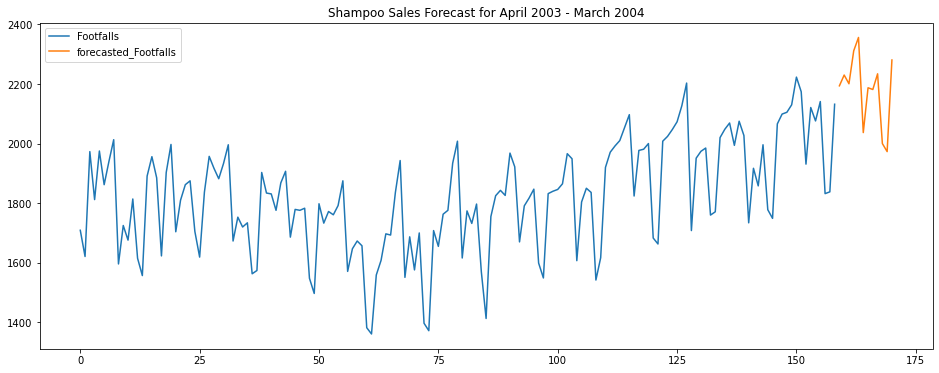

In [62]:
new_var[['Footfalls','forecasted_Footfalls']].reset_index(drop=True).plot(figsize = (16,6))

plt.title('Shampoo Sales Forecast for April 2003 - March 2004')
plt.show()

### THE END!!